## Assignment 1A

### Problem 1 (30 points)
The file `velocities.txt` (available on myCourses), which contains two columns of numbers, the first representing time $t$ in seconds and the second the $x$-velocity in $\text{m/s}$ of a particle, measured once every second from time $t=0$ to $t=100$. Write a program to do the following:

#### Problem 1.A
Read in the data and, using the trapezoidal rule, calculate, from them, the approximate distance traveled by the particle in the $x$ direction as a function of time.

In [2]:
# Imports
import numpy as np

# Read the data from the file
with open("velocities.tsv", "r") as file:
    data = file.readlines()
    data = [line.split() for line in data]
    data = np.array(data, dtype=float)

# Split into columns, time and velocity (m/s)
time, velocity = data[:, 0], data[:, 1]

# Make a trapezoidal integration function
def trapezoid_integration(x, y):
    return (1/2) * np.sum((y[1:] + y[:-1]) * (x[1:] - x[:-1]))

# Integrate the velocity to get the distance
distance = trapezoid_integration(time, velocity)
print(f"The total distance traveled is {distance:.3f} meters.")

The total distance traveled is 8.219 meters.


#### Problem 1.B
Extend your program to make a graph that shows, on the same plot, both the original velocity curve and the distance traveled as a function of time.

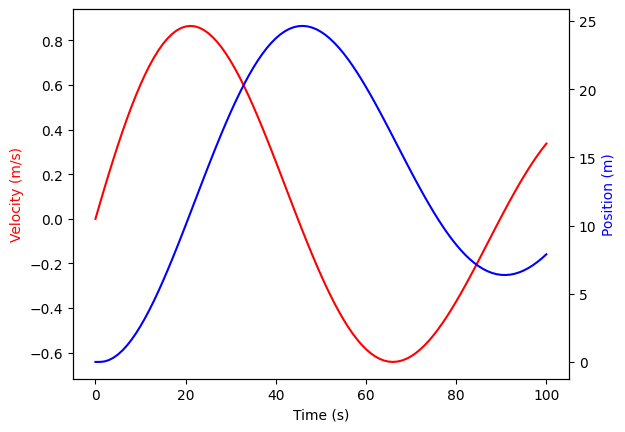

In [3]:
# Make a graph of both position and velocity
import matplotlib.pyplot as plt

# Calculate the position with respect to time (s)
distance = [trapezoid_integration(time[:i], velocity[:i]) for i in range(len(time))]

# Plot the position and velocity on 1 graph the left axis for position and the right axis for velocity
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(time, velocity, 'r')
ax2.plot(time, distance, 'b')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)', color='r')
ax2.set_ylabel('Position (m)', color='b')
plt.show()

### Problem 2 (40 points)

#### Problem 2.A
Write a program that uses trapezoidal rule with 10 slices to calculate an approximate value for the integral:
$$\int_0^2\left(x^2-2x+1\right) dx$$

In [4]:
# Trapezoidal integration function
def trapezoid(f, x: np.ndarray, dx: np.ndarray | float) -> float:
    return np.sum((f(x[1:]) + f(x[:-1])) * dx) / 2

# Problem specifications
N: int = 10
a: float = 0
b: float = 2
dx: float = (b-a)/N
def f(x: float | int) -> np.ndarray | float:
    return x**2 - 2*x + 1

# Calculate the integral
x = np.linspace(a, b, N+1)
integral_trapezoid = trapezoid(f, x, dx)

# Print the result
print(f"The integral of x^2 - 2x + 1 from {a} to {b} is {integral_trapezoid:.6f}.")

The integral of x^2 - 2x + 1 from 0 to 2 is 0.680000.


#### Problem 2.B
Now write a program to calculate an approximate value for the same integral, but using Simpson’s rule with 10 slices.

In [5]:
# Simpson's rule function
def simpson(f, x: np.ndarray, dx: np.ndarray | float) -> float:
    return np.sum((f(x[0:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2])) * dx) / 3

# Problem specifications
N: int = 10
a: float = 0
b: float = 2
dx: float = (b-a)/N
def f(x: float | int) -> np.ndarray | float:
    return x**2 - 2*x + 1

# Calculate the integral
x = np.linspace(a, b, N+1)
integral_simpson = simpson(f, x, dx)

# Print the result
print(f"The integral of x^2 - 2x + 1 from {a} to {b} is {integral_simpson:.6f}.")

The integral of x^2 - 2x + 1 from 0 to 2 is 0.666667.


#### Problem 2.C
Run the program and compare your result to the known correct value that you could obtain by calculation (pen and paper). What is the fractional error on your calculation?

In [6]:
def F(x: float | int) -> float:
    return x**3/3 - x**2 + x

# Calculate the exact integral
exact = F(b) - F(a)
print(f"The exact integral is {exact:.6f}.")

# Compare to previous answers
print(f"The error for the trapezoidal rule is {abs(integral_trapezoid - exact)}.")
print(f"The error for Simpson's rule is {abs(integral_simpson - exact)}.")

The exact integral is 0.666667.
The error for the trapezoidal rule is 0.013333333333333641.
The error for Simpson's rule is 3.3306690738754696e-16.


#### Problem 2.D
Modify the program to use a hundred slices instead, then a thousand. Note the improvement in the result. How do the results compare with those for the trapezoidal rule with the same numbers of slices?

In [7]:
# Problem specifications
a: float = 0
b: float = 2
def f(x: float | int) -> np.ndarray | float:
    return x**2 - 2*x + 1

# 100 Slices
N: int = 100
dx: float = (b-a)/N

# Calculate the integral
x = np.linspace(a, b, N+1)
integral = trapezoid(f, x, dx)
print(f"The integral of x^2 - 2x + 1 from {a} to {b} is {integral:.6f}.")

# 1000 Slices
N: int = 1000
dx: float = (b-a)/N

# Calculate the integral
x = np.linspace(a, b, N+1)
integral = trapezoid(f, x, dx)
print(f"The integral of x^2 - 2x + 1 from {a} to {b} is {integral:.6f}.")

The integral of x^2 - 2x + 1 from 0 to 2 is 0.666800.
The integral of x^2 - 2x + 1 from 0 to 2 is 0.666668.


The trapezoid approaches the true value pretty slowly, as compared to the simpson's rule integration technique.

### Problem 3 (30 points)
Consider the integral:
$$E(x)=\int_0^x e^{-t^2} dt$$

#### Problem 3.A
Write a program to calculate $E(x)$ for values of $x$ from $0$ to $3$ in steps of $0.1$. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

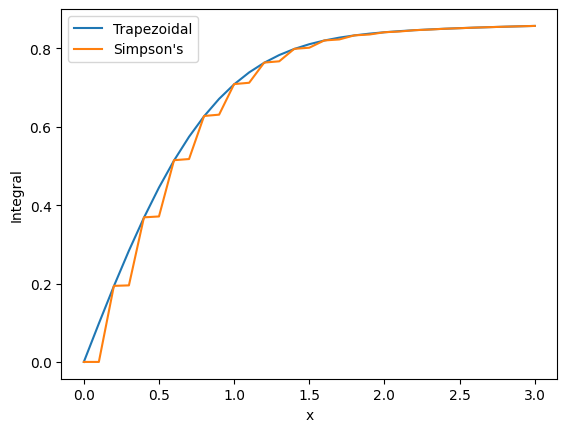

In [8]:
# Problem specifications
dx: float = 0.1
a: float = 0
b: float = 3
N: int = int((b-a)/dx)
def f(x: float | int) -> np.ndarray | float:
    return np.exp(-x**2)

# Define functions for integration
def trapezoid(f, x: np.ndarray, dx: np.ndarray | float) -> float:
    return np.sum((f(x[1:]) + f(x[:-1])) * dx) / 2
def simpson(f, x: np.ndarray, dx: np.ndarray | float) -> float:
    return np.sum((f(x[0:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2])) * dx) / 3

# Calculate the function for all x in [a,b]
integral_trapezoid = [trapezoid(f, np.linspace(a, a+dx+n*dx, n+1), dx) for n in range(N+1)]
integral_simpson = [simpson(f, np.linspace(a, a+dx+n*dx, n+1), dx) for n in range(N+1)]

# Make a plot of the integrals
plt.plot(np.linspace(a, b, N+1), integral_trapezoid, label="Trapezoidal")
plt.plot(np.linspace(a, b, N+1), integral_simpson, label="Simpson's")
plt.xlabel("x")
plt.ylabel("Integral")
plt.legend()
plt.show()


#### Problem 3.B
When you are convinced that your program is working, extend it further to make a graph of $E(x)$ as a function of $x$.

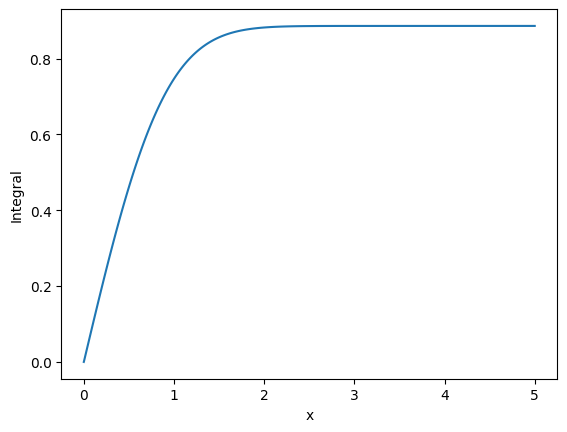

In [9]:
# Problem specifications
dx: float = 1e-4
a: float = 0
b: float = 5
def f(x: float | int) -> np.ndarray | float:
    return np.exp(-x**2)
def simpson(f, x: np.ndarray, dx: np.ndarray | float) -> float:
    return np.sum((f(x[0:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2])) * dx) / 3

# Calculate the integral function
x = np.arange(a, b+dx, dx)
e_x = np.array([simpson(f, x[:i], dx) for i in range(len(x))])

# Plot the integral function
plt.plot(x, e_x)
plt.xlabel("x")
plt.ylabel("Integral")
plt.show()

#### Problem 3.C
While it is not possible to obtain this integral analytically, it is possible to derive asymptotic expansions for small and large $x$.
Verify your numerical result by plotting it against the following asymptotic formulas:
$$E(x)=\begin{cases}\sim x&x\ll 1\\\sim\dfrac{\sqrt{\pi}}{2}-\dfrac{1}{2}\dfrac{e^{-x^2}}{x}&x\gg2\end{cases}$$

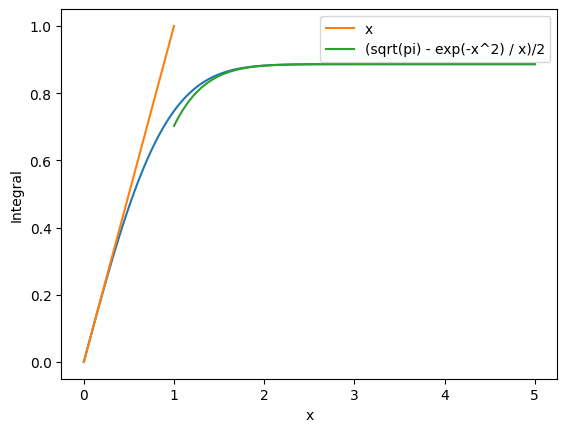

In [10]:
# Import math
import math

# Plot the integral function
plt.plot(x, e_x)
plt.xlabel("x")
plt.ylabel("Integral")

# Plot of the asymtotic behavior
def lower(x):
    return x
def upper(x):
    return (math.sqrt(math.pi) - np.exp(-x**2) / x) / 2
x_lower = np.linspace(0, 1, 100)
x_upper = np.linspace(1, 5, 300)
plt.plot(x_lower, lower(x_lower), label="x")
plt.plot(x_upper, upper(x_upper), label="(sqrt(pi) - exp(-x^2) / x)/2")
plt.legend()
plt.show()

As we can see from the graph, the asymtotic functions listed are indeed correct for their branches of the graph.